In [138]:
#import requaired library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [139]:
#load the dataset
train=pd.read_excel("Flite_Data_Train.xlsx")

In [140]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [141]:
test=pd.read_excel("Flite_Test_set.xlsx")

In [142]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [143]:
flight=train.append(test,sort=False)
flight

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN


In [144]:
flight.isnull().sum() #check the null values in our dataset

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [145]:
flight.info()    #check the information 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


In [146]:
flight.shape    #check the how many row and columns in our data set

(13354, 11)

In [147]:
flight.columns  #ckeck the columns names

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [148]:
flight.describe()  #statistical summary of the numaric data

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [149]:
flight.dtypes   #check the type of data like its numarical or object 

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

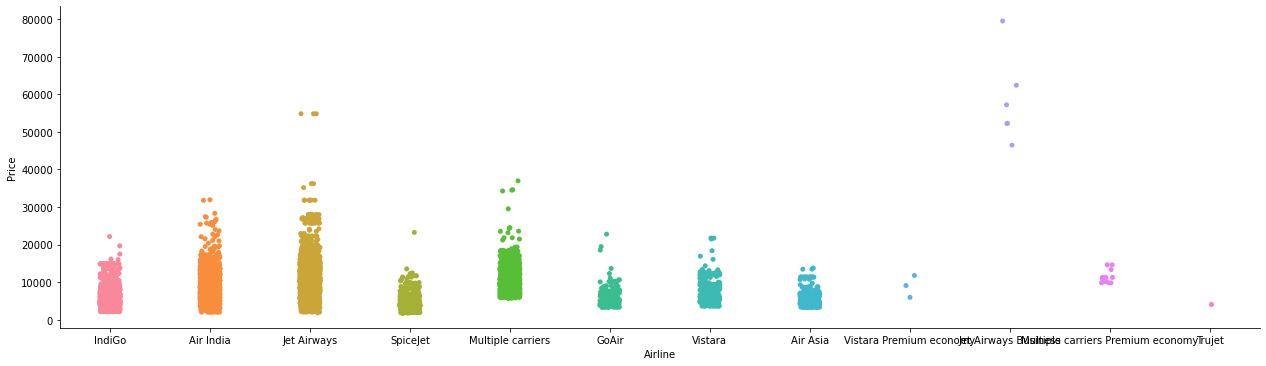

In [150]:

sns.catplot(y = "Price", x = "Airline", data =flight,aspect = 3.5)
plt.show()



 From graph we can see that Jet Airways business have the highest Price.

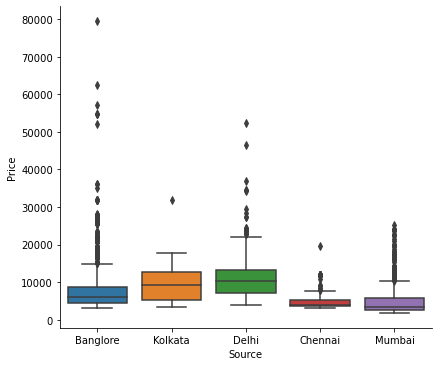

In [151]:

sns.catplot(y = "Price", x = "Source", data = flight,kind="box",aspect = 1.2)

plotting a box plot between price and source in witch banglore have higher outlier and channin has least

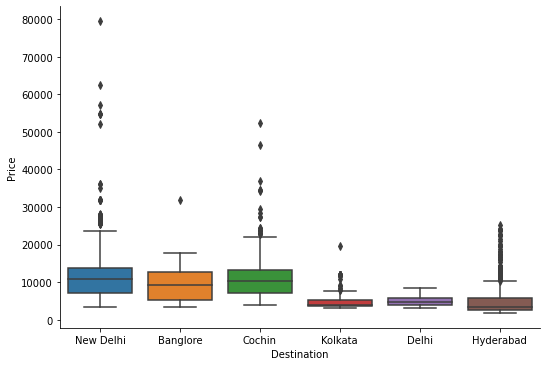

In [152]:

sns.catplot(y = "Price", x = "Destination", data = flight,kind="box",aspect =1.5)

Here we are plotting the box plot with the help of a cat plot between the price of the flight and 
the destination to which the passenger is travelling and figured out that New Delhi has the most outliers
and Kolkata has the least.

Text(0.5, 1.0, 'rought of flight')

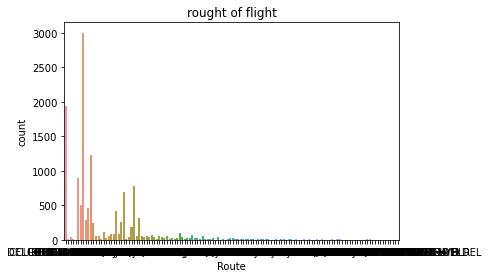

In [153]:
sns.countplot(flight['Route'])
plt.title("rought of flight")
#sns.catplot(y = "Price", x = "Route", data = flight,kind="hist",aspect =3)

18/05/2019    633
6/06/2019     630
9/05/2019     628
12/06/2019    628
21/05/2019    615
9/06/2019     614
21/03/2019    516
15/05/2019    511
27/05/2019    447
24/06/2019    436
15/06/2019    433
1/06/2019     430
27/06/2019    430
3/06/2019     425
6/03/2019     405
24/03/2019    401
27/03/2019    364
24/05/2019    357
6/05/2019     355
1/05/2019     339
1/04/2019     335
12/05/2019    327
3/03/2019     280
9/03/2019     255
18/03/2019    197
15/03/2019    195
01/03/2019    186
12/03/2019    185
9/04/2019     149
3/04/2019     138
21/06/2019    133
18/06/2019    127
03/03/2019    123
06/03/2019    123
09/03/2019    123
3/05/2019     117
6/04/2019     114
24/04/2019    113
15/04/2019    112
27/04/2019    109
21/04/2019    104
18/04/2019     79
12/04/2019     74
1/03/2019      59
Name: Date_of_Journey, dtype: int64

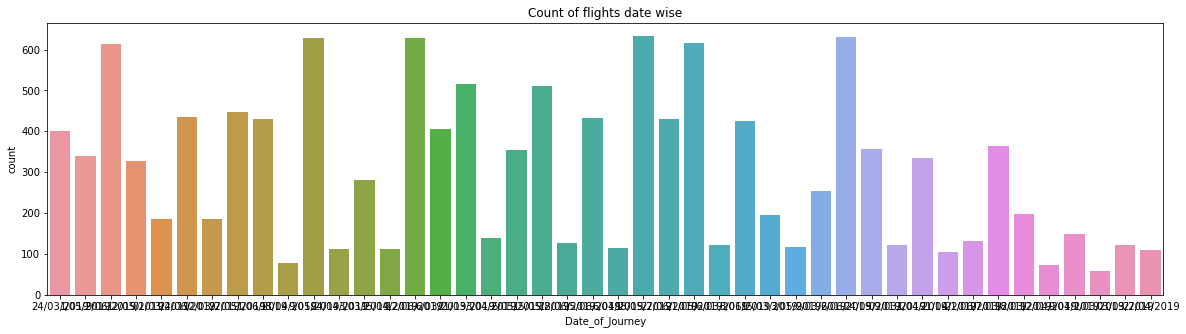

In [154]:
plt.figure(figsize = (20, 5))
plt.title('Count of flights date wise')
ax=sns.countplot(x = 'Date_of_Journey', data = flight)
flight["Date_of_Journey"].value_counts()

Text(0, 0.5, 'Count of flights')

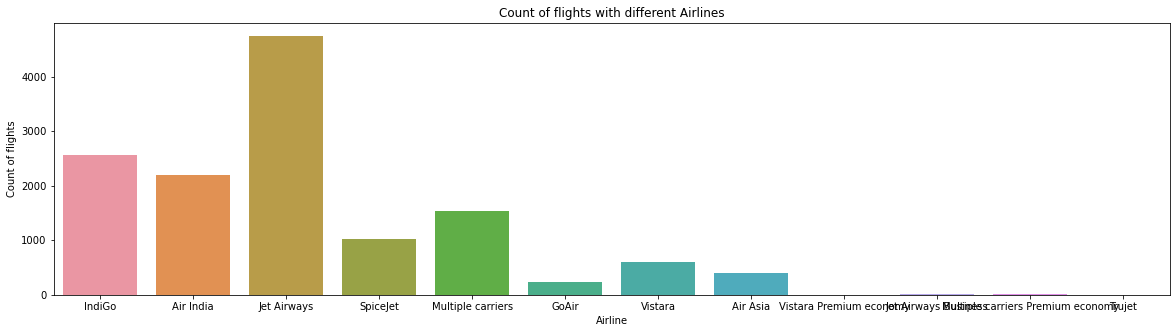

In [155]:
plt.figure(figsize = (20,5))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =flight)
plt.xlabel('Airline')
plt.ylabel('Count of flights')

#Jet Airways has the most flight boarded

In [156]:
flight["date_of_Journey"]=flight["Date_of_Journey"].str.split("/").str[0]
flight["month_of_Journey"]=flight['Date_of_Journey'].str.split("/").str[1]
flight["year_of_Journey"]=flight["Date_of_Journey"].str.split("/").str[2]

In [157]:
flight.drop("Date_of_Journey",axis=1,inplace=True)

In [158]:
flight

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date_of_Journey,month_of_Journey,year_of_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN,6,06,2019
2667,IndiGo,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,27,03,2019
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN,6,03,2019
2669,Air India,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN,6,03,2019


In [159]:
flight["Dep_hour"]=flight["Dep_Time"].str.split(":").str[0]
flight["Dep_minuts"]=flight["Dep_Time"].str.split(":").str[1]


In [160]:
flight.drop("Dep_Time",axis=1,inplace=True)


In [161]:
flight

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date_of_Journey,month_of_Journey,year_of_Journey,Dep_hour,Dep_minuts
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019,09,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019,18,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:25 07 Jun,23h 55m,1 stop,No info,NaN,6,06,2019,20,30
2667,IndiGo,Kolkata,Banglore,CCU → BLR,16:55,2h 35m,non-stop,No info,NaN,27,03,2019,14,20
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Mar,6h 35m,1 stop,No info,NaN,6,03,2019,21,50
2669,Air India,Delhi,Cochin,DEL → BOM → COK,19:15,15h 15m,1 stop,No info,NaN,6,03,2019,04,00


In [162]:
flight["Total_Stops"]=flight["Total_Stops"].fillna("1 stop")
flight["Total_Stops"]=flight["Total_Stops"].replace("non-stop","0 stop")

In [163]:
flight["Total_Stops"].isnull().sum()


0

In [164]:
flight.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date_of_Journey,month_of_Journey,year_of_Journey,Dep_hour,Dep_minuts
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,0 stop,No info,3897.0,24,03,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019,09,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019,18,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019,16,50


In [165]:
flight["Stops"]=flight["Total_Stops"].str.split(' ').str[0]  #split the values in no.

In [166]:
flight["Stops"]=flight["Stops"].astype(int) #converting object to int

In [167]:
flight["Arrival_Time"]=flight["Arrival_Time"].str.split(' ').str[0]

In [168]:
flight["Arrival_hour"]=flight['Arrival_Time'].str.split(':').str[0]
flight["Arrival_minuts"]=flight["Arrival_Time"].str.split(':').str[1]

In [169]:
flight.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date_of_Journey,month_of_Journey,year_of_Journey,Dep_hour,Dep_minuts,Stops,Arrival_hour,Arrival_minuts
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10,2h 50m,0 stop,No info,3897.0,24,03,2019,22,20,0,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019,05,50,2,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25,19h,2 stops,No info,13882.0,9,06,2019,09,25,2,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019,18,05,1,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019,16,50,1,21,35


In [170]:
flight["Arrival_hour"]=flight["Arrival_hour"].astype(int)
flight["Arrival_minuts"]=flight["Arrival_minuts"].astype(int)

In [171]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           13354 non-null  object 
 1   Source            13354 non-null  object 
 2   Destination       13354 non-null  object 
 3   Route             13353 non-null  object 
 4   Arrival_Time      13354 non-null  object 
 5   Duration          13354 non-null  object 
 6   Total_Stops       13354 non-null  object 
 7   Additional_Info   13354 non-null  object 
 8   Price             10683 non-null  float64
 9   date_of_Journey   13354 non-null  object 
 10  month_of_Journey  13354 non-null  object 
 11  year_of_Journey   13354 non-null  object 
 12  Dep_hour          13354 non-null  object 
 13  Dep_minuts        13354 non-null  object 
 14  Stops             13354 non-null  int32  
 15  Arrival_hour      13354 non-null  int32  
 16  Arrival_minuts    13354 non-null  int32  

In [172]:
flight.drop(["Arrival_Time","Total_Stops"],axis=1,inplace=True)

In [173]:
flight.head(2)

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,date_of_Journey,month_of_Journey,year_of_Journey,Dep_hour,Dep_minuts,Stops,Arrival_hour,Arrival_minuts
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897.0,24,03,2019,22,20,0,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662.0,1,05,2019,05,50,2,13,15


In [174]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           13354 non-null  object 
 1   Source            13354 non-null  object 
 2   Destination       13354 non-null  object 
 3   Route             13353 non-null  object 
 4   Duration          13354 non-null  object 
 5   Additional_Info   13354 non-null  object 
 6   Price             10683 non-null  float64
 7   date_of_Journey   13354 non-null  object 
 8   month_of_Journey  13354 non-null  object 
 9   year_of_Journey   13354 non-null  object 
 10  Dep_hour          13354 non-null  object 
 11  Dep_minuts        13354 non-null  object 
 12  Stops             13354 non-null  int32  
 13  Arrival_hour      13354 non-null  int32  
 14  Arrival_minuts    13354 non-null  int32  
dtypes: float64(1), int32(3), object(11)
memory usage: 1.7+ MB


In [175]:
flight["Additional_Info"].isnull().sum()

0

# fill the null values

In [176]:
flight['Route'].fillna((flight['Route'].mode()[0]), inplace=True)

In [177]:
flight['Price'].fillna((flight['Price'].mean()), inplace=True)

In [178]:
flight["date_of_Journey"]=flight["date_of_Journey"].astype(int)
flight["month_of_Journey"]=flight["month_of_Journey"].astype(int)
flight["year_of_Journey"]=flight["year_of_Journey"].astype(int)

In [179]:
flight["Dep_hour"]=flight["Dep_hour"].astype(int)
flight["Dep_minuts"]=flight["Dep_hour"].astype(int)

In [180]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           13354 non-null  object 
 1   Source            13354 non-null  object 
 2   Destination       13354 non-null  object 
 3   Route             13354 non-null  object 
 4   Duration          13354 non-null  object 
 5   Additional_Info   13354 non-null  object 
 6   Price             13354 non-null  float64
 7   date_of_Journey   13354 non-null  int32  
 8   month_of_Journey  13354 non-null  int32  
 9   year_of_Journey   13354 non-null  int32  
 10  Dep_hour          13354 non-null  int32  
 11  Dep_minuts        13354 non-null  int32  
 12  Stops             13354 non-null  int32  
 13  Arrival_hour      13354 non-null  int32  
 14  Arrival_minuts    13354 non-null  int32  
dtypes: float64(1), int32(8), object(6)
memory usage: 1.5+ MB


In [181]:
flight.isnull().sum()

Airline             0
Source              0
Destination         0
Route               0
Duration            0
Additional_Info     0
Price               0
date_of_Journey     0
month_of_Journey    0
year_of_Journey     0
Dep_hour            0
Dep_minuts          0
Stops               0
Arrival_hour        0
Arrival_minuts      0
dtype: int64

In [182]:
flight.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration',
       'Additional_Info', 'Price', 'date_of_Journey', 'month_of_Journey',
       'year_of_Journey', 'Dep_hour', 'Dep_minuts', 'Stops', 'Arrival_hour',
       'Arrival_minuts'],
      dtype='object')

In [183]:
catg=[col for col in flight.columns if flight[col].dtype=="object"]
catg

['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Additional_Info']

# apply the LabelEncoder

In [184]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le=preprocessing.LabelEncoder()

In [185]:
for i in catg:
    flight[i]=le.fit_transform(flight[i].astype("str"))

In [186]:
flight

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,date_of_Journey,month_of_Journey,year_of_Journey,Dep_hour,Dep_minuts,Stops,Arrival_hour,Arrival_minuts
0,3,0,5,18,242,8,3897.000000,24,3,2019,22,22,0,1,10
1,1,3,0,87,342,8,7662.000000,1,5,2019,5,5,2,13,15
2,4,2,1,122,106,8,13882.000000,9,6,2019,9,9,2,4,25
3,3,3,0,95,317,8,6218.000000,12,5,2019,18,18,1,23,30
4,3,0,5,29,309,8,13302.000000,1,3,2019,16,16,1,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,76,168,8,9087.064121,6,6,2019,20,20,1,20,25
2667,3,3,0,67,239,8,9087.064121,27,3,2019,14,14,0,16,55
2668,4,2,1,108,332,8,9087.064121,6,3,2019,21,21,1,4,25
2669,1,2,1,108,62,8,9087.064121,6,3,2019,4,4,1,19,15


In [187]:
flight.skew()

Airline             0.720924
Source             -0.424151
Destination         1.247893
Route              -0.521448
Duration           -0.192160
Additional_Info    -1.784752
Price               2.026457
date_of_Journey     0.135142
month_of_Journey   -0.390684
year_of_Journey     0.000000
Dep_hour            0.109087
Dep_minuts          0.109087
Stops               0.317797
Arrival_hour       -0.384591
Arrival_minuts      0.111711
dtype: float64

remove outliers

In [188]:
Q1 = flight.quantile(0.25)
Q3 = flight.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Airline                1.00
Source                 1.00
Destination            2.00
Route                 59.00
Duration             181.00
Additional_Info        0.00
Price               4951.75
date_of_Journey       15.00
month_of_Journey       3.00
year_of_Journey        0.00
Dep_hour              10.00
Dep_minuts            10.00
Stops                  1.00
Arrival_hour          11.00
Arrival_minuts        25.00
dtype: float64


In [189]:
new_flight = flight[~((flight < (Q1 - 1.5 * IQR)) |(flight > (Q3 + 1.5 * IQR))).any(axis=1)]
new_flight.shape

(3866, 15)

removeing outlier

In [190]:
flight.shape

(13354, 15)

<AxesSubplot:>

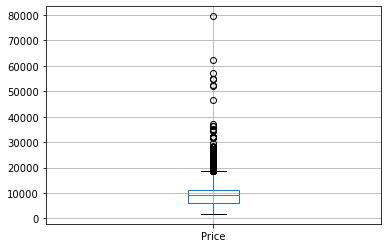

In [191]:
flight.boxplot(column='Price')

In [192]:
print(flight['Price'].quantile(0.10))
print(flight['Price'].quantile(0.90))

4174.0
14231.0


In [193]:
flight["Price"] = np.where(flight["Price"] <4174.0, 4174.0,flight['Price'])
flight["Price"] = np.where(flight["Price"] >14231.0, 14231.0,flight['Price'])
print(flight['Price'].skew())

0.15794427548588058


In [194]:
flight.skew()

Airline             0.720924
Source             -0.424151
Destination         1.247893
Route              -0.521448
Duration           -0.192160
Additional_Info    -1.784752
Price               0.157944
date_of_Journey     0.135142
month_of_Journey   -0.390684
year_of_Journey     0.000000
Dep_hour            0.109087
Dep_minuts          0.109087
Stops               0.317797
Arrival_hour       -0.384591
Arrival_minuts      0.111711
dtype: float64

# split the data in future and target variable

In [195]:
x=flight.drop(['Price'],axis=1)
y=flight.Price

In [196]:
y=y.values.reshape(-1,1)

# scaling for norman=lization the data

In [197]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

# split the data in train and test

In [198]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [199]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)
y_pred = reg_rf.predict(x_test)

In [200]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1310.988914729403
MSE: 3182760.421722593
RMSE: 1784.0292659378076


In [201]:
#from sklearn.metrics import r2_score
metrics.r2_score(y_test, y_pred)

0.6964787847298561

In [202]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


In [203]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# The coefficients
print("Coefficients: \n", lr.coef_)
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))


MAE: 2068.9163892123893
MSE: 6186865.1767273685
RMSE: 2487.3409852144055
Coefficients: 
 [[ 327.18773928 -105.53109419  -77.53331211 -199.5677418  -248.97798283
     8.23353057 -316.87254538 -227.09271941    0.           85.2409281
    85.2409281  2082.77465591   10.45151641 -110.27212194]]
Coefficient of determination: 0.41


ValueError: x and y must be the same size

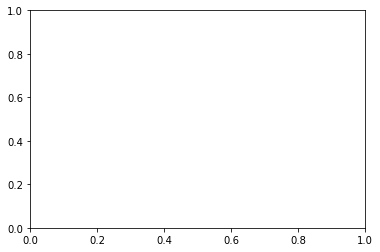

In [204]:
#plt.scatter(x_test=x_test,y_test=y_test, color="black")
#plt.plot(X_test=x_test,y_pred, color="blue", linewidth=3)
#plt.scatter(x=x,y=y)
#plt.show()
#plt.xticks(())
#plt.yticks(())
plt.scatter(x,y)
plt.show()

In [205]:
 from sklearn.linear_model import LogisticRegression

In [206]:
LR = LinearRegression()
LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
LR.score(x, y)

MAE: 2068.9163892123893
MSE: 6186865.1767273685
RMSE: 2487.3409852144055


0.4088607050876185

ValueError: x and y must be the same size

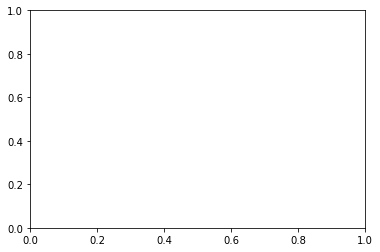

In [207]:
# data points
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')

# predicted values
plt.plot(x, y_pred, color='r')
plt.show()


In [208]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1556.5624020619537
MSE: 3931373.225327059
RMSE: 1982.769080182324


In [209]:
dt =DecisionTreeRegressor()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)


print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1399.662083413062
MSE: 5225501.0819922425
RMSE: 2285.9354938388446


In [ ]:
x.shape

In [ ]:
y.shape

In [ ]:
from sklearn.model_selection import cross_val_predict

In [ ]:
predicted = cross_val_predict(lr, X, y, cv=10)

In [ ]:
(x.shape)
y.shape

In [ ]:
x.shape

In [ ]:
x_test.shape

In [ ]:
y_test.shape

In [ ]:
x_train.shape

In [ ]:
y_train.shape